homework requirement ：  
Train model for IRIS dataset  
l Draw the ROC curve   
l Draw learning curve   
l Draw validation curve   
l With k-fold cross-validation   
l With parameter optimization  
l Nested cross validation would be better   
l SVM/DecisionTree/....   
Deadline: May 1st

# import packages and dataset

In [1]:
from sklearn import svm, datasets, metrics 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset

iris data set content：data, target, target_names, feature_names, filename, DESCR

In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

read iris data set，and save as dataframe type

In [3]:
data_pd = pd.read_csv(iris.filename)

In [4]:
data_pd.rename(columns = {'150':'sepal length (cm)','4':'sepal width (cm)','setosa':'petal length (cm)','versicolor':'petal width (cm)','virginica':'kind'},inplace = True)

In [5]:
data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kind
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


divide original set into training set and test set: x_train, x_test, y_train, y_test  
stratification rule：The training set and test set were assigned according to the actual value ratio of iris classification

In [6]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=1, stratify=iris.target)

# Exploratory Data Analysis

In [7]:
def features_ill(framework,feature):
    facet = sns.FacetGrid(framework, hue="kind",aspect=2)
    facet.map(sns.kdeplot,feature,shade= True)
    facet.set(xlim=(framework[feature].min(), framework[feature].max()))
    facet.add_legend()
    plt.xlabel(feature) 
    plt.ylabel('density') 
    plt.title(feature+'_kind')

Distribution of various irises under different features

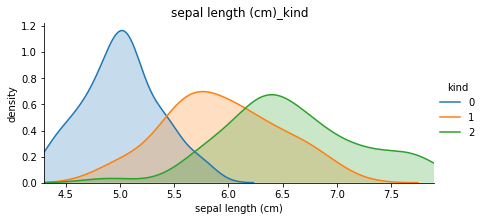

In [8]:
features_ill(data_pd,'sepal length (cm)')

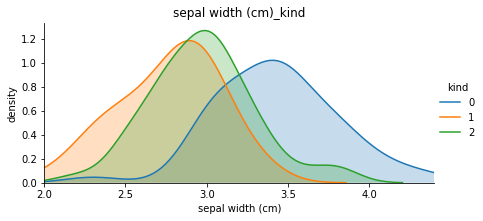

In [9]:
features_ill(data_pd,'sepal width (cm)')

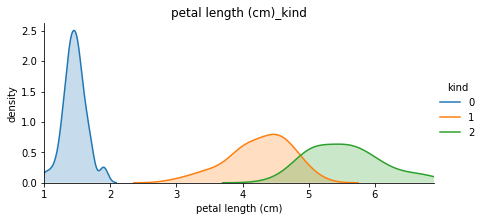

In [10]:
features_ill(data_pd,'petal length (cm)')

What a wonderful data set!!

# data reduction

standardscale 均值归一化

In [11]:
ss = StandardScaler()
ss.fit(x_train)
x_train_std = ss.transform(x_train)
x_test_std = ss.transform(x_test) # 测试集需要和训练集标准化的方法一致


print(np.mean(x_train_std))
print(np.var(x_train_std))
x_train_std

-2.0724163126336256e-16
0.9999999999999999


array([[ 0.5516363 ,  0.78411646,  1.02361578,  1.57858012],
       [ 0.5516363 ,  0.55865166,  1.24600666,  1.70928133],
       [ 2.09200497, -0.11774273,  1.57959297,  1.1864765 ],
       [ 1.02559589,  0.55865166,  1.0792135 ,  1.1864765 ],
       [ 0.31465651, -1.01960191,  1.02361578,  0.27156806],
       [ 2.21049487, -1.01960191,  1.74638613,  1.44787891],
       [ 2.21049487,  1.68597564,  1.63519069,  1.31717771],
       [-1.34420206,  0.33318686, -1.20029298, -1.29684641],
       [-0.04081319, -0.56867232,  0.74562719,  1.57858012],
       [-0.04081319, -0.79413711,  0.74562719,  0.92507409],
       [ 0.07767671, -0.11774273,  0.24524772,  0.40226927],
       [-1.34420206,  0.33318686, -1.36708613, -1.29684641],
       [-0.15930308, -0.34320752,  0.24524772,  0.14086686],
       [-0.98873237,  0.33318686, -1.42268385, -1.29684641],
       [ 0.19616661, -0.34320752,  0.41204087,  0.40226927],
       [ 0.19616661, -0.11774273,  0.57883403,  0.79437288],
       [-0.87024247,  1.

# Model Training

In [12]:
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, validation_curve

validation curve function

In [13]:
param_range = [0.01, 0.1, 1, 10.0, 100.0,1000.0]
def plot_validation_curve(estimator, X, y, ylim, cv=None, param_name=None, param_range=param_range):
    train_scores, test_scores = validation_curve(estimator=estimator,X=X, y=y,param_name=param_name,param_range=param_range,cv=cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(param_range, train_mean+train_std, train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(param_range, test_mean, color='green', linestyle='--',marker='s', markersize=5, label='validation accuracy')
    plt.fill_between(param_range, test_mean+test_std, test_mean-test_std,alpha=0.15,color='green')
    plt.grid()
    plt.xscale('log')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim(ylim)
    plt.title('validation curve')
    plt.show()

learning curve function

In [14]:
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(0.1,1.0,10), verbose=0):
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, X=X, y=y, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', markersize=5, label='validation accuracy')
    plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std,alpha=0.15,color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.0])
    plt.xlim([train_sizes.min(), train_sizes.max()])
    plt.title('learning curve')
    plt.show()

## logistic regression

### Nested cross-validation

logical regression parameter

In [15]:
log_reg=LogisticRegression()
param_range = [0.01, 0.1, 1, 10.0, 100.0,1000.0]
param_grid = [{'C':param_range}]
GSlog=GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy',cv=10) ##GridSearchCV

best_score = GSlog.fit(x_train_std, y_train).best_score_
best_params = GSlog.fit(x_train_std, y_train).best_params_
print('best_score = ',best_score,'best_params = ', best_params)

scores_log=cross_val_score(GSlog,x_train_std,y_train,scoring='accuracy',cv=5) ## 5 fold cross validation
print(scores_log,np.mean(scores_log),np.var(scores_log))

best_score =  0.9222222222222223 best_params =  {'C': 100.0}
[0.94444444 0.88888889 0.94444444 1.         0.77777778] 0.9111111111111111 0.005679012345679012


In [16]:
log_reg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [17]:
model=GSlog.fit(x_train_std, y_train)
pred=model.predict(x_test_std)

### validation_curve

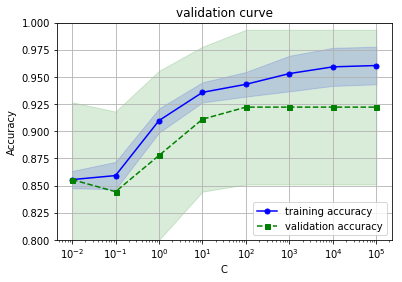

In [18]:
param_range = [0.01, 0.1, 1, 10.0, 100.0,1000.0,10000.0,100000.0]
plot_validation_curve(estimator=log_reg, X=x_train_std, y=y_train, ylim=[0.8,1],param_name='C', param_range=param_range, cv=10)

accroding to validation curve, 10^2 is the best parameter C

### learning_curve

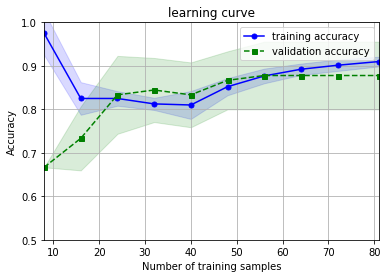

In [19]:
plot_learning_curve(estimator=log_reg, X=x_train_std, y=y_train, cv=10)

不是典型的学习曲线，训练集学习曲线先降后升

Only according to the learning curve, I can't judge whether the model is over fitting or under-fitting（traning set accuracy curve doesn't converge.）

考虑到离群点影响与样本数量较少，可以考虑替换train_test_split函数的随机数参数，或者增加样本数量

## SVM

### Nested cross-validation

In [20]:
svm_clf = svm.SVC(random_state=1)
param_range = [0.01, 0.1, 1, 10.0, 100.0]
param_grid = [{'C': param_range, 'kernel': ['linear']},
            {'C': param_range, 'kernel': ['rbf'], 'gamma':param_range}]
GSsvm=GridSearchCV(estimator=svm_clf, param_grid=param_grid, scoring='accuracy',cv=10) # GridSearchCV

best_score = GSsvm.fit(x_train_std, y_train).best_score_
best_params = GSsvm.fit(x_train_std, y_train).best_params_
print('best_score = ',best_score,'best_params = ', best_params)

scores_svm=cross_val_score(GSsvm,x_train_std,y_train,scoring='accuracy',cv=5)# Nested cross-validation
print(scores_svm,np.mean(scores_svm),np.var(scores_svm))

best_score =  0.9555555555555556 best_params =  {'C': 1, 'kernel': 'linear'}
[0.94444444 0.94444444 0.94444444 1.         0.94444444] 0.9555555555555555 0.0004938271604938276


In [21]:
svm_clf.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [22]:
model=GSsvm.fit(x_train_std, y_train)
pred=model.predict(x_test_std)

### validation_curve

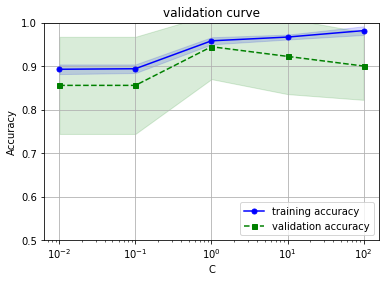

In [23]:
plot_validation_curve(estimator=svm_clf, X=x_train_std, y=y_train, ylim=[0.5,1],param_name='C', param_range=param_range, cv=10)

parameter C=1 best

### svm learning curve

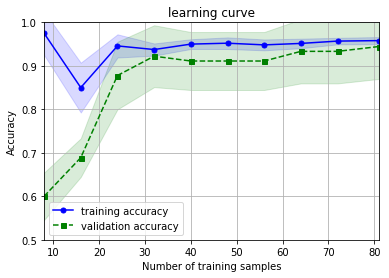

In [24]:
plot_learning_curve(estimator=svm_clf, X=x_train_std, y=y_train, cv=10, train_sizes=np.linspace(0.1,1.0,10))

与上文的逻辑回归模型有一样的训练集学习曲线先降后升问题，见4.1.3。  

不过这次，2条学习曲线收敛到一块了。  
虽然可能欠拟合高bias低variance，但validation curve 和 GridSearchCV的调参结果是最优的，说明更复杂的模型不能提高验证成绩，所以该模型未欠拟合。

## decision tree

### Nested cross-validation

In [25]:
tree_clf=DecisionTreeClassifier(random_state=0)
GS_tree = GridSearchCV(
    estimator=tree_clf,
    param_grid = [{'max_depth':[1,2,3,4,5]}],
    scoring='accuracy',
    cv=10
)

best_score = GS_tree.fit(x_train_std, y_train).best_score_
best_params = GS_tree.fit(x_train_std, y_train).best_params_
print('best_score = ',best_score,'best_params = ', best_params)

scores_tree = cross_val_score(GS_tree, x_train_std, y_train, scoring='accuracy', cv=5)
print(scores_tree,np.mean(scores_tree),np.var(scores_tree))

best_score =  0.9333333333333333 best_params =  {'max_depth': 5}
[0.94444444 0.88888889 0.88888889 0.94444444 0.94444444] 0.9222222222222223 0.0007407407407407415


In [26]:
tree_clf.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

### validation_curve

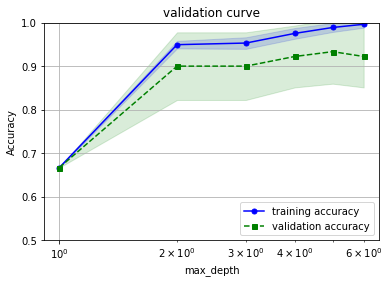

In [27]:
plot_validation_curve(estimator=tree_clf, X=x_train_std, y=y_train, ylim=[0.5,1],param_name='max_depth', param_range=[1,2,3,4,5,6], cv=10)

parameter max_depth = 5 best

### svm learning curve

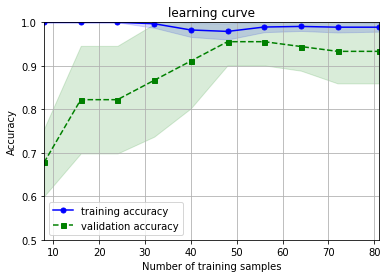

In [28]:
plot_learning_curve(estimator=DecisionTreeClassifier(random_state=0, max_depth = 5), X=x_train_std, y=y_train, cv=10, train_sizes=np.linspace(0.1,1.0,10))

# Draw the ROC curve (take SVM model as an example)

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

SVM model result best, take it as an example，draw the ROC curve

In [30]:
svm_clf = svm.SVC(random_state=1, C = 1, kernel= 'linear',probability = True)

To draw ROC curve for multi-classification problems, we need to take macro average or micro average

micro average

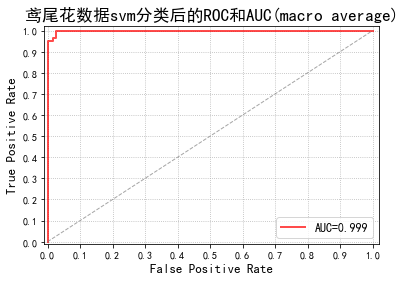

In [39]:
# 多分类问题的ROC曲线，分类标签要编码
y_one_hot = label_binarize(y_test, np.arange(3))
model=svm_clf.fit(x_train_std, y_train)
y_score=model.predict_proba(x_test_std)
metrics.roc_auc_score(y_one_hot, y_score, average='micro')
fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
#绘图,FPR就是横坐标,TPR就是纵坐标
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'鸢尾花数据svm分类后的ROC和AUC(macro average)', fontsize=17)
plt.show()

micro average

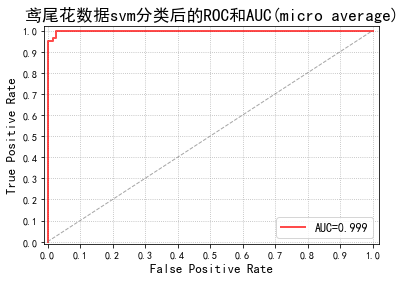

In [38]:
metrics.roc_auc_score(y_one_hot, y_score, average='macro')
fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
#绘图,FPR就是横坐标,TPR就是纵坐标
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'鸢尾花数据svm分类后的ROC和AUC(micro average)', fontsize=17)
plt.show()

RPC曲线表现的很好，在误诊率很低的情况下就达到极高的召回率  
另外，由于原数据集3种分类分布均匀，所以以宏平均和微平均为基础画的ROC曲线没什么区别

# harvest

## 10折交叉验证得到的模型比5折交叉验证得到的模型(exactly parameter)有更好的泛化能力

决策树模型中，5折交叉验证最优参max_depth =3，10折交叉验证最优参max_depth = 5，10折效果中测试集学习曲线明显升高

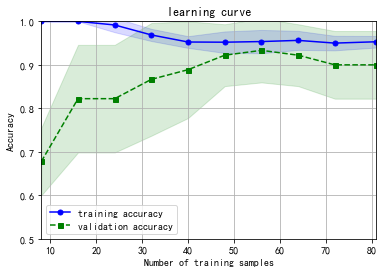

In [33]:
plot_learning_curve(estimator=DecisionTreeClassifier(random_state=0, max_depth = 3), X=x_train_std, y=y_train, cv=10, train_sizes=np.linspace(0.1,1.0,10))

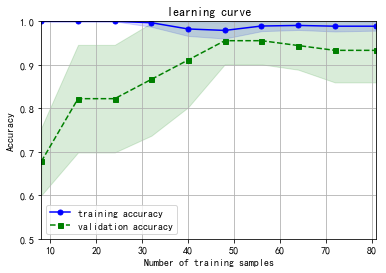

In [34]:
plot_learning_curve(estimator=DecisionTreeClassifier(random_state=0, max_depth = 5), X=x_train_std, y=y_train, cv=10, train_sizes=np.linspace(0.1,1.0,10))

## 训练集学习曲线先下降后上升的可能原因是数据集太小，导致学习曲线刚开始，训练出的模型受干扰太大

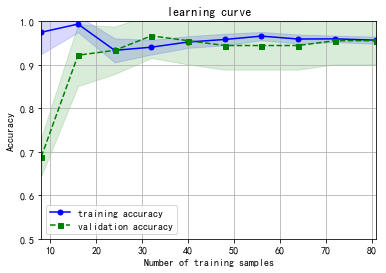

In [35]:
plot_learning_curve(estimator=svm_clf, X=x_train_std, y=y_train, cv=10, train_sizes=np.linspace(0.1,1.0,10))

## 多分类画ROC curve，有两种方法1.macro average 2.micro average

为了综合多个类别的分类情况，评测系统整体性能，经常采用的还有微平均F1（micro-averaging）和宏平均F1（macro-averaging ）两种指标。宏平均F1与微平均F1是以两种不同的平均方式求的全局的F1指标。其中宏平均F1的计算方法先对每个类别单独计算F1值，再取这些F1值的算术平均值作为全局指标。而微平均F1的计算方法是先累加计算各个类别的a、b、c、d的值，再由这些值求出F1值。由两种平均F1的计算方式不难看出，宏平均F1平等对待每一个类别，所以它的值主要受到稀有类别的影响，而微平均F1平等考虑文档集中的每一个文档，所以它的值受到常见类别的影响比较大。